# **Import modules**

In [1]:
import pandas as pd
import numpy as np

import os
import sys

import random

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import tensorflow as tf
from tensorflow import keras

from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# **Download data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Emotion_Recognition/

/content/drive/MyDrive/Emotion_Recognition


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

## 1- RAVDESS

In [ ]:
!mkdir RAVDESS

In [ ]:
%cd /content/drive/MyDrive/Emotion_Recognition/RAVDESS/

In [ ]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

In [ ]:
!unzip /content/drive/MyDrive/Emotion_Recognition/RAVDESS/ravdess-emotional-speech-audio.zip

In [4]:
RAVDESS_path = "/content/drive/MyDrive/Emotion_Recognition/RAVDESS/audio_speech_actors_01-24/"
ravdess_directory_list = os.listdir(RAVDESS_path)

file_emotion = []
file_path = []

for dir in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(RAVDESS_path + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(RAVDESS_path + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
Ravdess_df = Ravdess_df.sample(frac=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
print(len(Ravdess_df))
Ravdess_df.head()


1440


,Emotions,Path
1393,calm,/content/drive/MyDrive/Emotion_Recognition/RAV...
1398,angry,/content/drive/MyDrive/Emotion_Recognition/RAV...
137,calm,/content/drive/MyDrive/Emotion_Recognition/RAV...
1205,neutral,/content/drive/MyDrive/Emotion_Recognition/RAV...
1321,sad,/content/drive/MyDrive/Emotion_Recognition/RAV...


## 2- CREMA

In [ ]:
%cd /content/drive/MyDrive/Emotion_Recognition/

In [ ]:
!mkdir CREMA

In [ ]:
%cd /content/drive/MyDrive/Emotion_Recognition/CREMA/

In [ ]:
!kaggle datasets download -d ejlok1/cremad

In [ ]:
!unzip /content/drive/MyDrive/Emotion_Recognition/CREMA/cremad.zip

In [5]:
CREMA_path = "/content/drive/MyDrive/Emotion_Recognition/CREMA/AudioWAV/"
crema_directory_list = os.listdir(CREMA_path)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(CREMA_path + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df = Crema_df.sample(frac=1)
print(len(Crema_df))
Crema_df.head()


7442


,Emotions,Path
6333,neutral,/content/drive/MyDrive/Emotion_Recognition/CRE...
7087,angry,/content/drive/MyDrive/Emotion_Recognition/CRE...
5691,disgust,/content/drive/MyDrive/Emotion_Recognition/CRE...
4625,fear,/content/drive/MyDrive/Emotion_Recognition/CRE...
3061,neutral,/content/drive/MyDrive/Emotion_Recognition/CRE...


## 3- TESS

In [ ]:
%cd /content/drive/MyDrive/Emotion_Recognition/

In [ ]:
!mkdir TESS

In [ ]:
%cd /content/drive/MyDrive/Emotion_Recognition/TESS/

In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

In [ ]:
!unzip /content/drive/MyDrive/Emotion_Recognition/TESS/toronto-emotional-speech-set-tess.zip

In [6]:
TESS_path = "/content/drive/MyDrive/Emotion_Recognition/TESS/TESS_Toronto_emotional_speech_set_data/"
tess_directory_list = os.listdir(TESS_path)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(TESS_path + dir)
    for file_ in directories:
        part = file_.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(TESS_path + dir + '/' + file_)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df = Tess_df.sample(frac=1)
print(len(Tess_df))
Tess_df.head()

2800


,Emotions,Path
1045,happy,/content/drive/MyDrive/Emotion_Recognition/TES...
551,sad,/content/drive/MyDrive/Emotion_Recognition/TES...
1421,angry,/content/drive/MyDrive/Emotion_Recognition/TES...
1131,happy,/content/drive/MyDrive/Emotion_Recognition/TES...
325,surprise,/content/drive/MyDrive/Emotion_Recognition/TES...


## 4- SAVEE

In [ ]:
%cd /content/drive/MyDrive/Emotion_Recognition/

In [ ]:
!mkdir SAVEE

In [ ]:
%cd /content/drive/MyDrive/Emotion_Recognition/SAVEE/

In [ ]:
!kaggle datasets download -d barelydedicated/savee-database

In [ ]:
!unzip /content/drive/MyDrive/Emotion_Recognition/SAVEE/savee-database.zip

In [7]:
SAVEE_path = "/content/drive/MyDrive/Emotion_Recognition/SAVEE/AudioData/"
savee_directory_list = os.listdir(SAVEE_path)
savee_directory_list.remove("Info.txt")

file_emotion = []
file_path = []

for folder in savee_directory_list:
  path = SAVEE_path + folder + '/'
  for file_ in os.listdir(path):

    file_path.append(SAVEE_path + folder + '/' + file_)
    part = file_.split('.')[0]
    ele = part[:-2]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df = Savee_df.sample(frac=1)
print(len(Savee_df))
Savee_df.head()


480


,Emotions,Path
7,angry,/content/drive/MyDrive/Emotion_Recognition/SAV...
364,disgust,/content/drive/MyDrive/Emotion_Recognition/SAV...
262,happy,/content/drive/MyDrive/Emotion_Recognition/SAV...
237,surprise,/content/drive/MyDrive/Emotion_Recognition/SAV...
208,neutral,/content/drive/MyDrive/Emotion_Recognition/SAV...


# **Merge all datasets together**

In [8]:
# merge all data frames together but without the records that are with Emotions='calm' 
# because this class only exist in RAVDESS_df and have 180 records only so it may cause unbalance in our dataset so we will have 7 classes only 
# we will append 100 records with Emotions='neutral' from CREMA_df to make our dataset balanced
data_path = pd.concat([Ravdess_df[Ravdess_df['Emotions'] != 'calm'], Savee_df, Tess_df[:1500], Crema_df[Crema_df['Emotions'] == 'neutral'][:100]], axis = 0)
data_path.to_csv("data_path.csv",index=False)
print(len(data_path))
data_path.Path[0]

3328


'/content/drive/MyDrive/Emotion_Recognition/SAVEE/AudioData/DC/a01.wav'

In [4]:
data_df = pd.read_csv('data_path.csv')

# **EDA**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


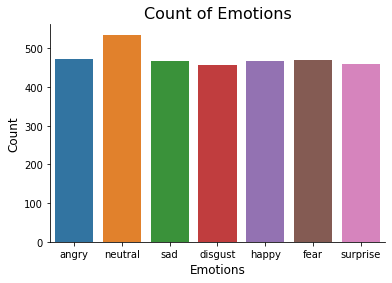

In [5]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

# **Prepare spectrogram**

In [6]:
def load_wav(path):
    data, sample_rate = librosa.load(path)
    data_16k = librosa.resample(data, orig_sr=sample_rate, target_sr=16000)
    if len(data) < 3*sample_rate:
      zero_padding = np.zeros((3*sample_rate - len(data))) 
      data = np.hstack((data, zero_padding))
    else:
      data = data[:3*sample_rate]

    return data

In [7]:
def preprocess(file_path): 
    wav = load_wav(file_path)
    spectrogram = librosa.stft(wav)
    spectrogram = librosa.amplitude_to_db(abs(spectrogram))
    spectrogram = np.expand_dims(spectrogram, axis=2)
    return spectrogram

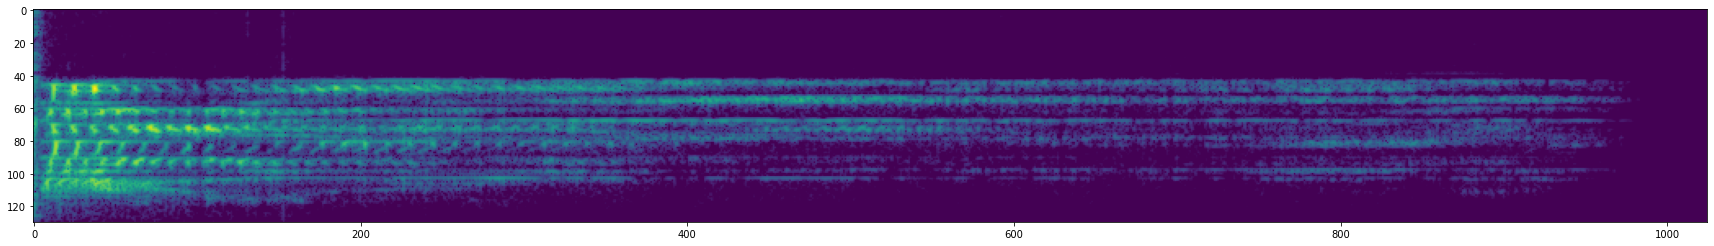

In [8]:
spec = preprocess(data_df.Path[10])
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spec)[0])
plt.show()

In [9]:
print(spec.shape)
print(type(spec))

(1025, 130, 1)
<class 'numpy.ndarray'>


In [10]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(data_df['Emotions'])

y = keras.utils.to_categorical(y, num_classes=7)
print(y.shape)

(3328, 7)


In [ ]:
X, Y = [], []

for path, emotion in zip(data_df['Path'], y):
    spectro = preprocess(path)

    X.append(spectro)
    Y.append(emotion)
    

In [12]:
# save X & Y to make sure that we will not lose them if kernel has crashed
import pickle

with open('X', 'wb') as f:
  pickle.dump(X, f)

with open('Y', 'wb') as f:
  pickle.dump(Y, f) 

In [4]:
import pickle

with open('X', 'rb') as f:
  X = pickle.load(f) 

with open('Y', 'rb') as f:
  Y = pickle.load(f) 

In [13]:
print(np.array(X).shape)
print(np.array(Y).shape)

(3328, 1025, 130, 1)
(3328, 7)


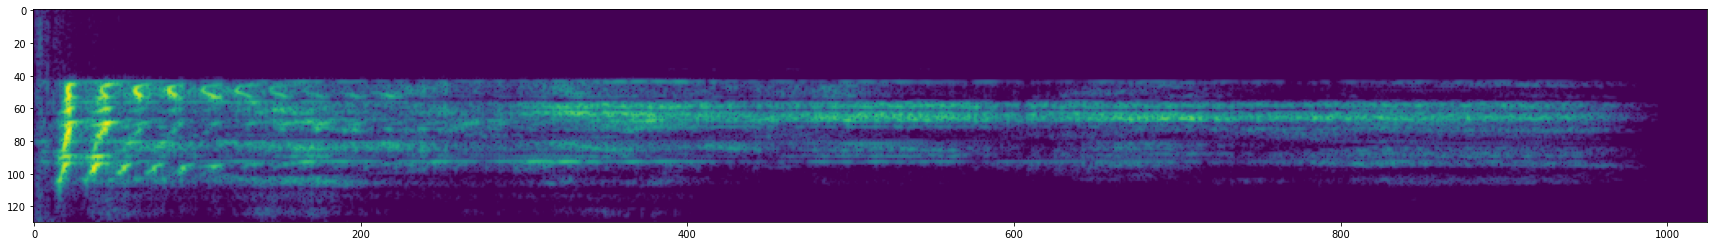

In [14]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(X[22])[0])
plt.show()

# **Prepare train & test data**

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=22)

In [16]:
len(X_train)
np.array(X_train).shape

(2662, 1025, 130, 1)

# **Model**

In [17]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(1025, 130, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1023, 128, 32)     320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 511, 64, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 509, 62, 32)       9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 254, 31, 32)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 252, 29, 32)       9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 126, 14, 32)      0

In [18]:
model.compile('rmsprop', loss='categorical_crossentropy', metrics=['Accuracy'])

In [19]:
history = model.fit(np.array(X_train), np.array(Y_train), epochs=10, batch_size=16, validation_data=(np.array(X_test), np.array(Y_test)))

Epoch 1/10
167/167 [==============================] - 24s 63ms/step - loss: 1.9039 - Accuracy: 0.2829 - val_loss: 1.2611 - val_Accuracy: 0.5180
Epoch 2/10
167/167 [==============================] - 9s 52ms/step - loss: 1.3042 - Accuracy: 0.5308 - val_loss: 0.9563 - val_Accuracy: 0.6216
Epoch 3/10
167/167 [==============================] - 8s 49ms/step - loss: 1.0745 - Accuracy: 0.6112 - val_loss: 0.8757 - val_Accuracy: 0.6787
Epoch 4/10
167/167 [==============================] - 8s 49ms/step - loss: 0.8908 - Accuracy: 0.6758 - val_loss: 0.8712 - val_Accuracy: 0.7012
Epoch 5/10
167/167 [==============================] - 8s 50ms/step - loss: 0.8382 - Accuracy: 0.7014 - val_loss: 0.8236 - val_Accuracy: 0.6922
Epoch 6/10
167/167 [==============================] - 8s 49ms/step - loss: 0.7521 - Accuracy: 0.7412 - val_loss: 0.7362 - val_Accuracy: 0.7267
Epoch 7/10
167/167 [==============================] - 8s 49ms/step - loss: 0.6651 - Accuracy: 0.7652 - val_loss: 0.7002 - val_Accuracy: 0.738

21/21 [==============================] - 2s 51ms/step - loss: 0.9707 - Accuracy: 0.7417
Accuracy of our model on test data :  74.17417168617249 %


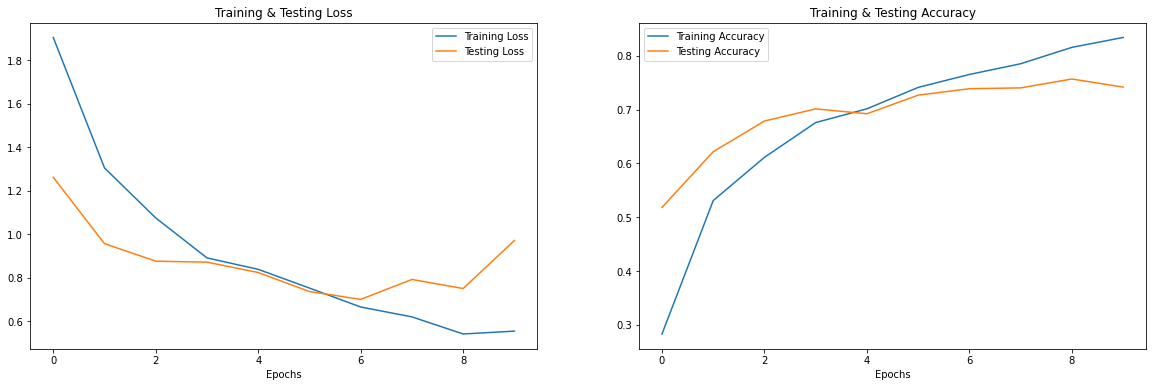

In [20]:
print("Accuracy of our model on test data : " , model.evaluate(np.array(X_test),np.array(Y_test))[1]*100 , "%")

epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['Accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_Accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()


In [21]:
model.save('Emotion_Recognition_with_spectro.h5')